In [1]:
import torch
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import DRLPDE.neuralnets as neuralnets
import importlib

mpl.rcParams['figure.dpi'] = 600
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['font.size'] = 8

In [2]:
steps = [0, 10, 100, 1000]
true_L2norm = np.sqrt(100.9340)

nn1 = 'Stochastic_nn1'
nn2 = 'Stochastic_nn2'
nn3 = 'Stochastic_nn3'
nn4 = 'Stochastic_nn4'

with open('experiments/'  + nn1 + '_errors.pickle', 'rb') as f:
    nn_errors1 = pickle.load(f)
with open('experiments/'  + nn2 + '_errors.pickle', 'rb') as f:
    nn_errors2 = pickle.load(f)
with open('experiments/'  + nn3 + '_errors.pickle', 'rb') as f:
    nn_errors3 = pickle.load(f)
with open('experiments/'  + nn4 + '_errors.pickle', 'rb') as f:
    nn_errors4 = pickle.load(f)



In [3]:
L2nn_errors1 = np.sqrt(nn_errors1[:,0,0])/true_L2norm
L2nn_errors2 = np.sqrt(nn_errors2[:,0,0])/true_L2norm
L2nn_errors3 = np.sqrt(nn_errors3[:,0,0])/true_L2norm
L2nn_errors4 = np.sqrt(nn_errors4[:,0,0])/true_L2norm

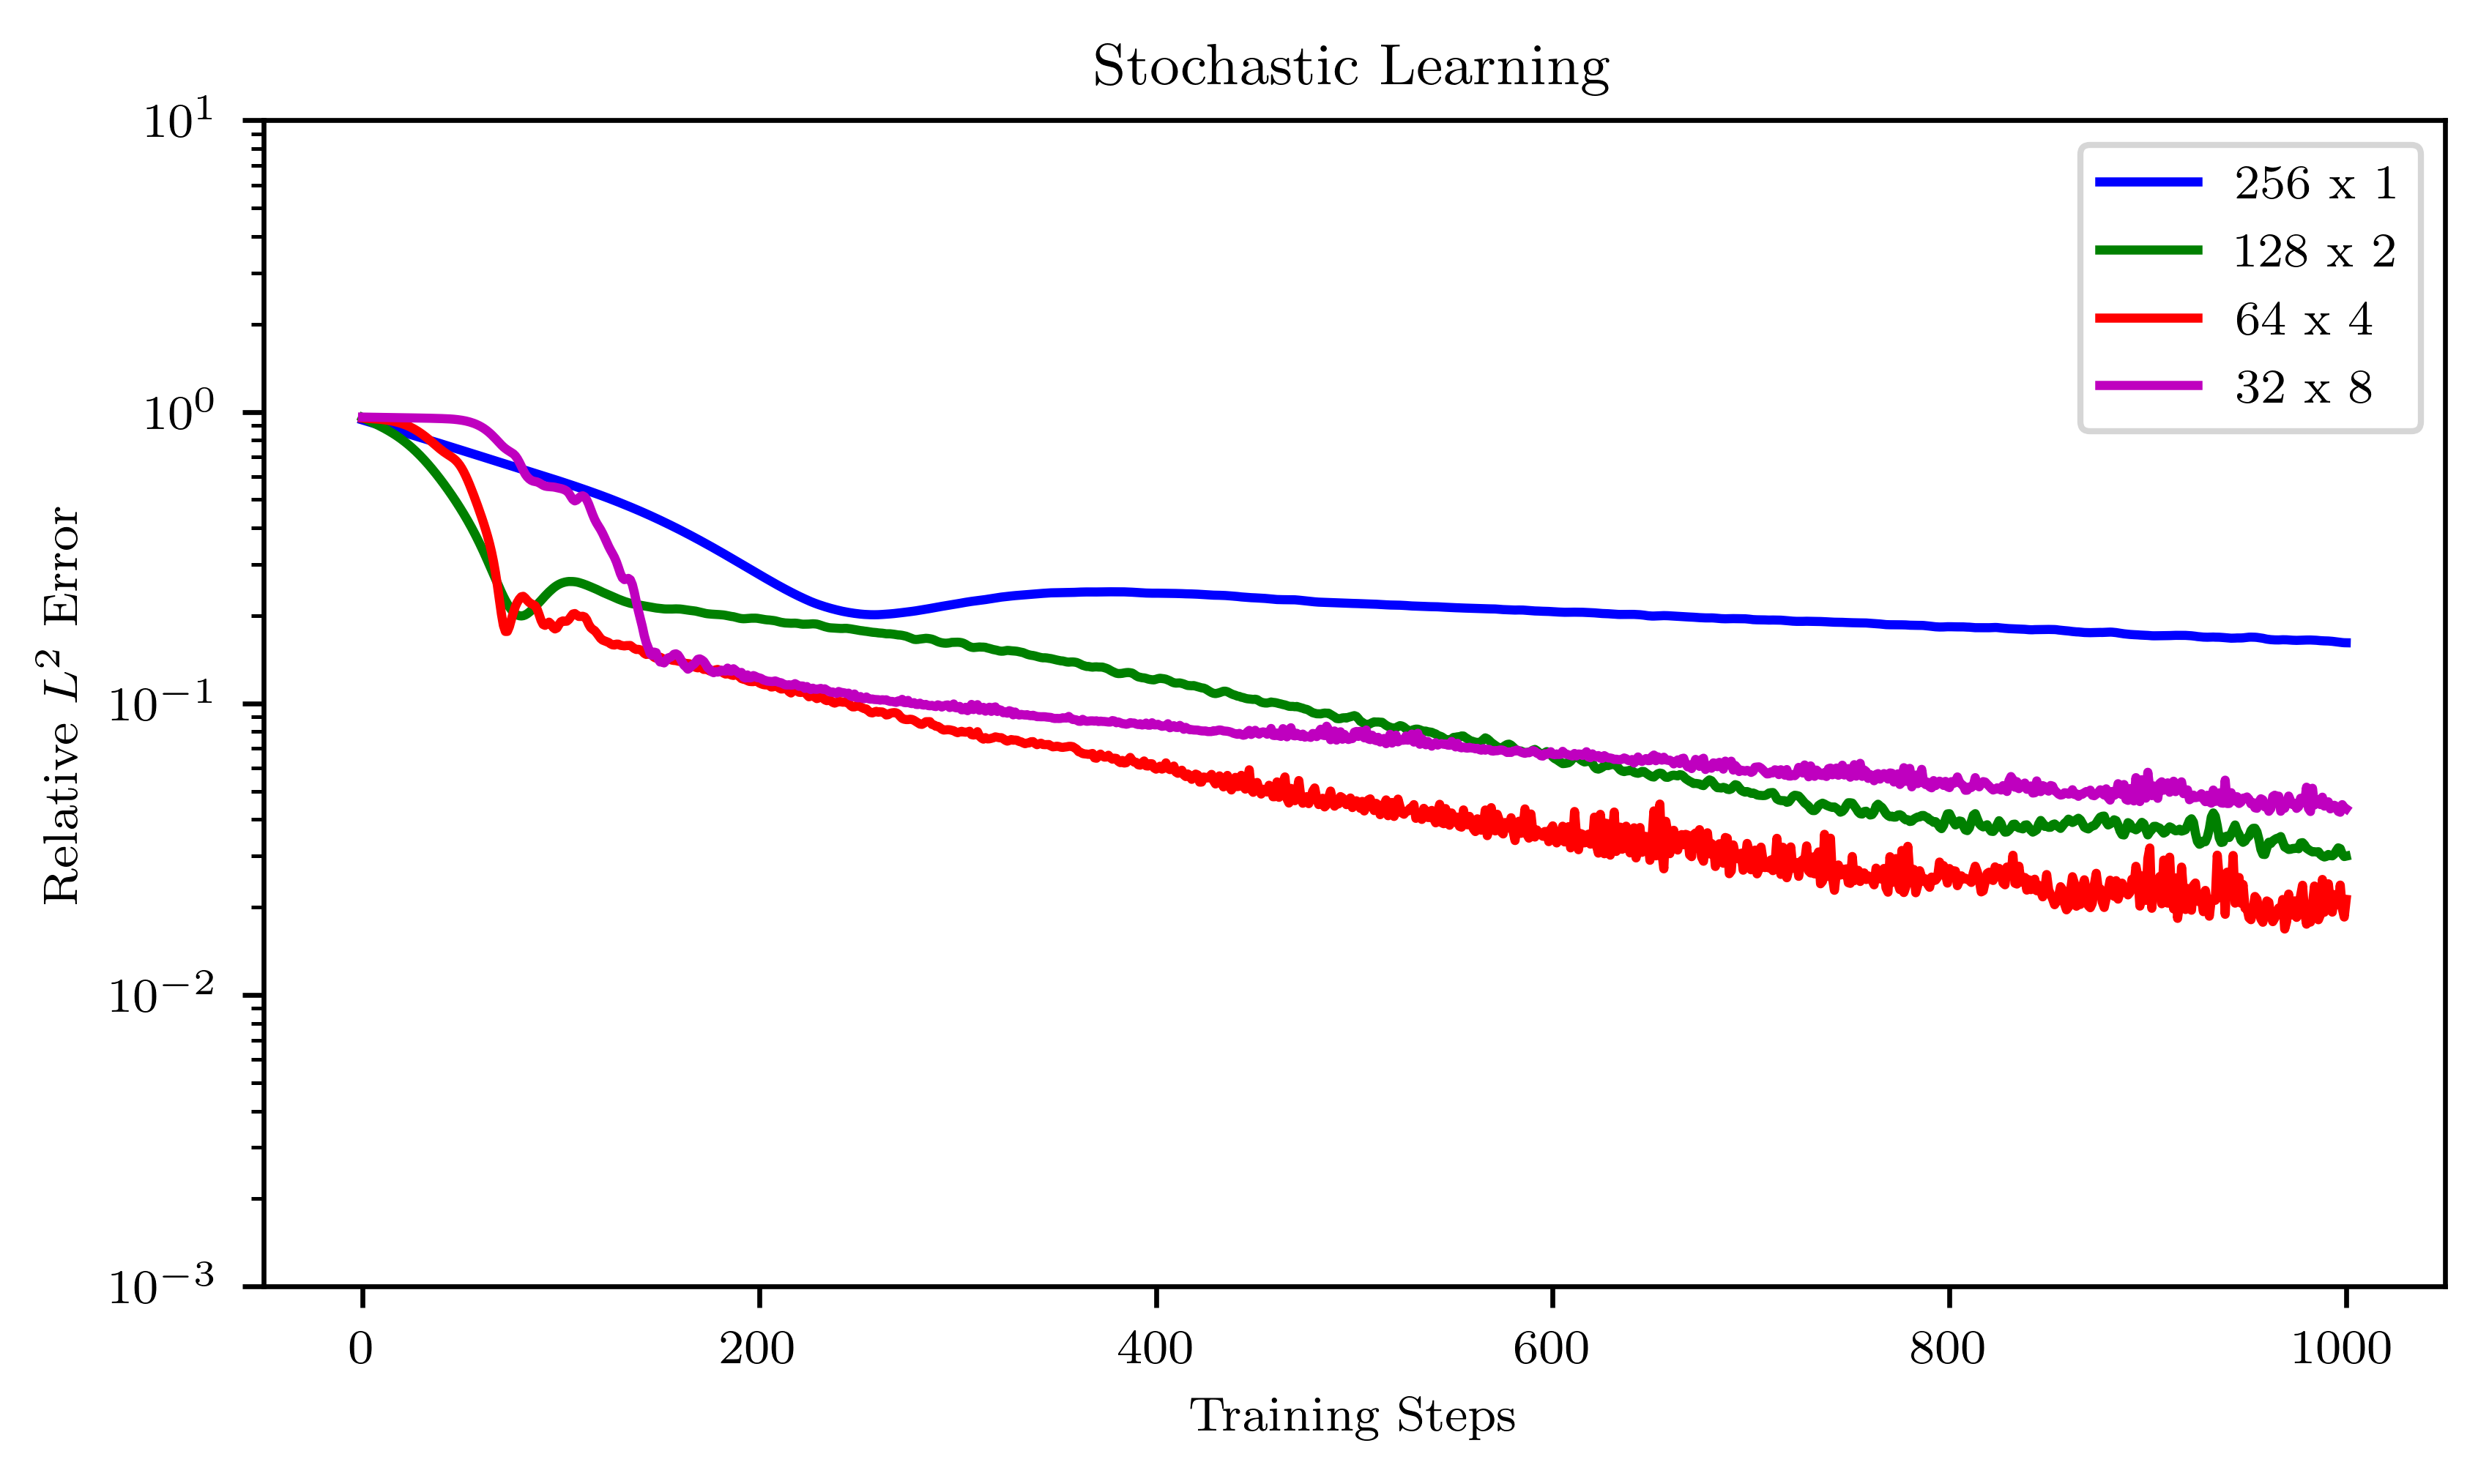

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Tuning Neural Network Size')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(1001), L2nn_errors1,'b')
ax.semilogy(range(1001), L2nn_errors2,'g')
ax.semilogy(range(1001), L2nn_errors3,'r')
ax.semilogy(range(1001), L2nn_errors4,'m')

ax.legend(['256 x 1', '128 x 2', '64 x 4', '32 x 8'])


In [8]:
ghost1 = 'Stochastic_ghost1'
ghost2 = 'Stochastic_ghost2'
ghost3 = 'Stochastic_ghost3'
ghost4 = 'Stochastic_ghost4'

with open('experiments/'  + ghost1 + '_errors.pickle', 'rb') as f:
    ghost_errors1 = pickle.load(f)
with open('experiments/'  + ghost2 + '_errors.pickle', 'rb') as f:
    ghost_errors2 = pickle.load(f)
with open('experiments/'  + ghost3 + '_errors.pickle', 'rb') as f:
    ghost_errors3 = pickle.load(f)
with open('experiments/'  + ghost4 + '_errors.pickle', 'rb') as f:
    ghost_errors4 = pickle.load(f)

L2ghost_errors1 = np.sqrt(ghost_errors1[:,0,0])/true_L2norm
L2ghost_errors2 = np.sqrt(ghost_errors2[:,0,0])/true_L2norm
L2ghost_errors3 = np.sqrt(ghost_errors3[:,0,0])/true_L2norm
L2ghost_errors4 = np.sqrt(ghost_errors4[:,0,0])/true_L2norm

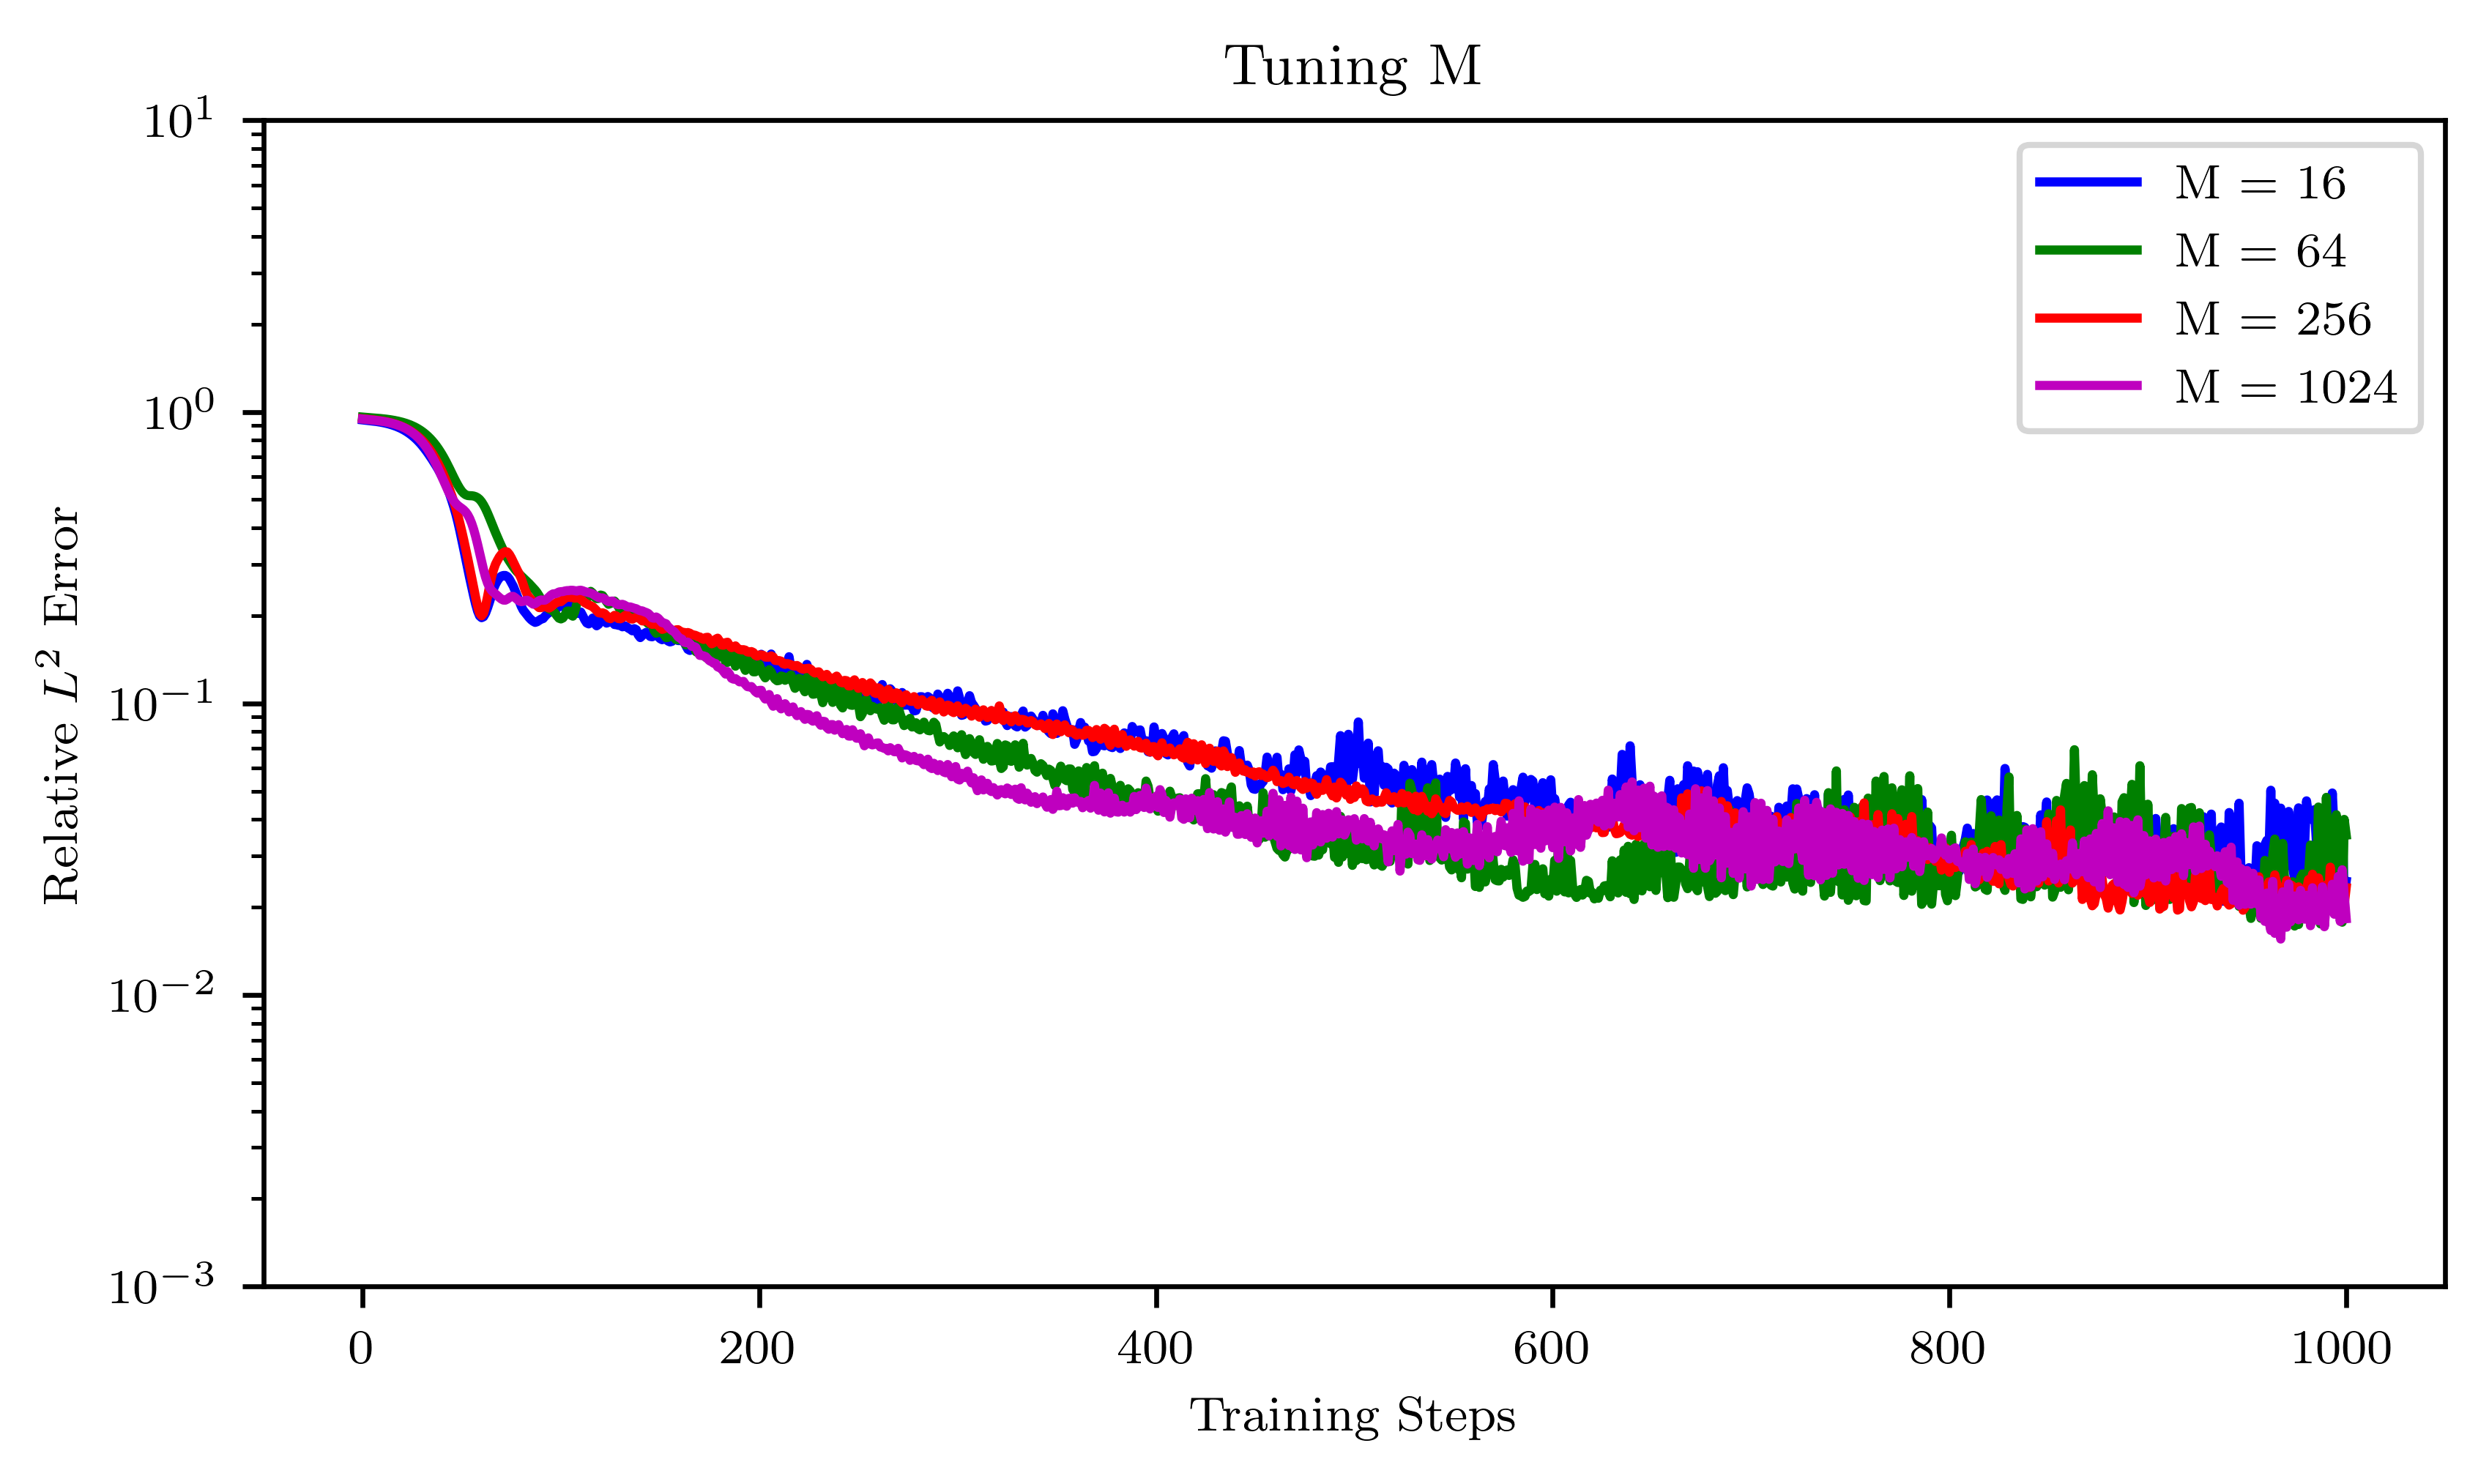

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Tuning M')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(1001), L2ghost_errors4,'b')
ax.semilogy(range(1001), L2ghost_errors3,'g')
ax.semilogy(range(1001), L2ghost_errors2,'r')
ax.semilogy(range(1001), L2ghost_errors1,'m')

ax.legend(['M = 16', 'M = 64', 'M =  256', 'M = 1024'])


In [11]:
dt1 = 'Stochastic_dt1'
dt2 = 'Stochastic_dt2'
dt3 = 'Stochastic_dt3'
dt4 = 'Stochastic_dt4'

with open('experiments/'  + dt1 + '_errors.pickle', 'rb') as f:
    dt_errors1 = pickle.load(f)
with open('experiments/'  + dt2 + '_errors.pickle', 'rb') as f:
    dt_errors2 = pickle.load(f)
with open('experiments/'  + dt3 + '_errors.pickle', 'rb') as f:
    dt_errors3 = pickle.load(f)
with open('experiments/'  + dt4 + '_errors.pickle', 'rb') as f:
    dt_errors4 = pickle.load(f)

with open('experiments/'  + dt1 + '_losses.pickle', 'rb') as f:
    dt_losses1 = pickle.load(f)
with open('experiments/'  + dt2 + '_losses.pickle', 'rb') as f:
    dt_losses2 = pickle.load(f)
with open('experiments/'  + dt3 + '_losses.pickle', 'rb') as f:
    dt_losses3 = pickle.load(f)
with open('experiments/'  + dt4 + '_losses.pickle', 'rb') as f:
    dt_losses4 = pickle.load(f)

L2dt_errors1 = np.sqrt(dt_errors1[:,0,0])
L2dt_errors2 = np.sqrt(dt_errors2[:,0,0])
L2dt_errors3 = np.sqrt(dt_errors3[:,0,0])
L2dt_errors4 = np.sqrt(dt_errors4[:,0,0])

L2dt_losses1 = np.sqrt(dt_losses1[:,0,0])
L2dt_losses2 = np.sqrt(dt_losses2[:,0,0])
L2dt_losses3 = np.sqrt(dt_losses3[:,0,0])
L2dt_losses4 = np.sqrt(dt_losses4[:,0,0])

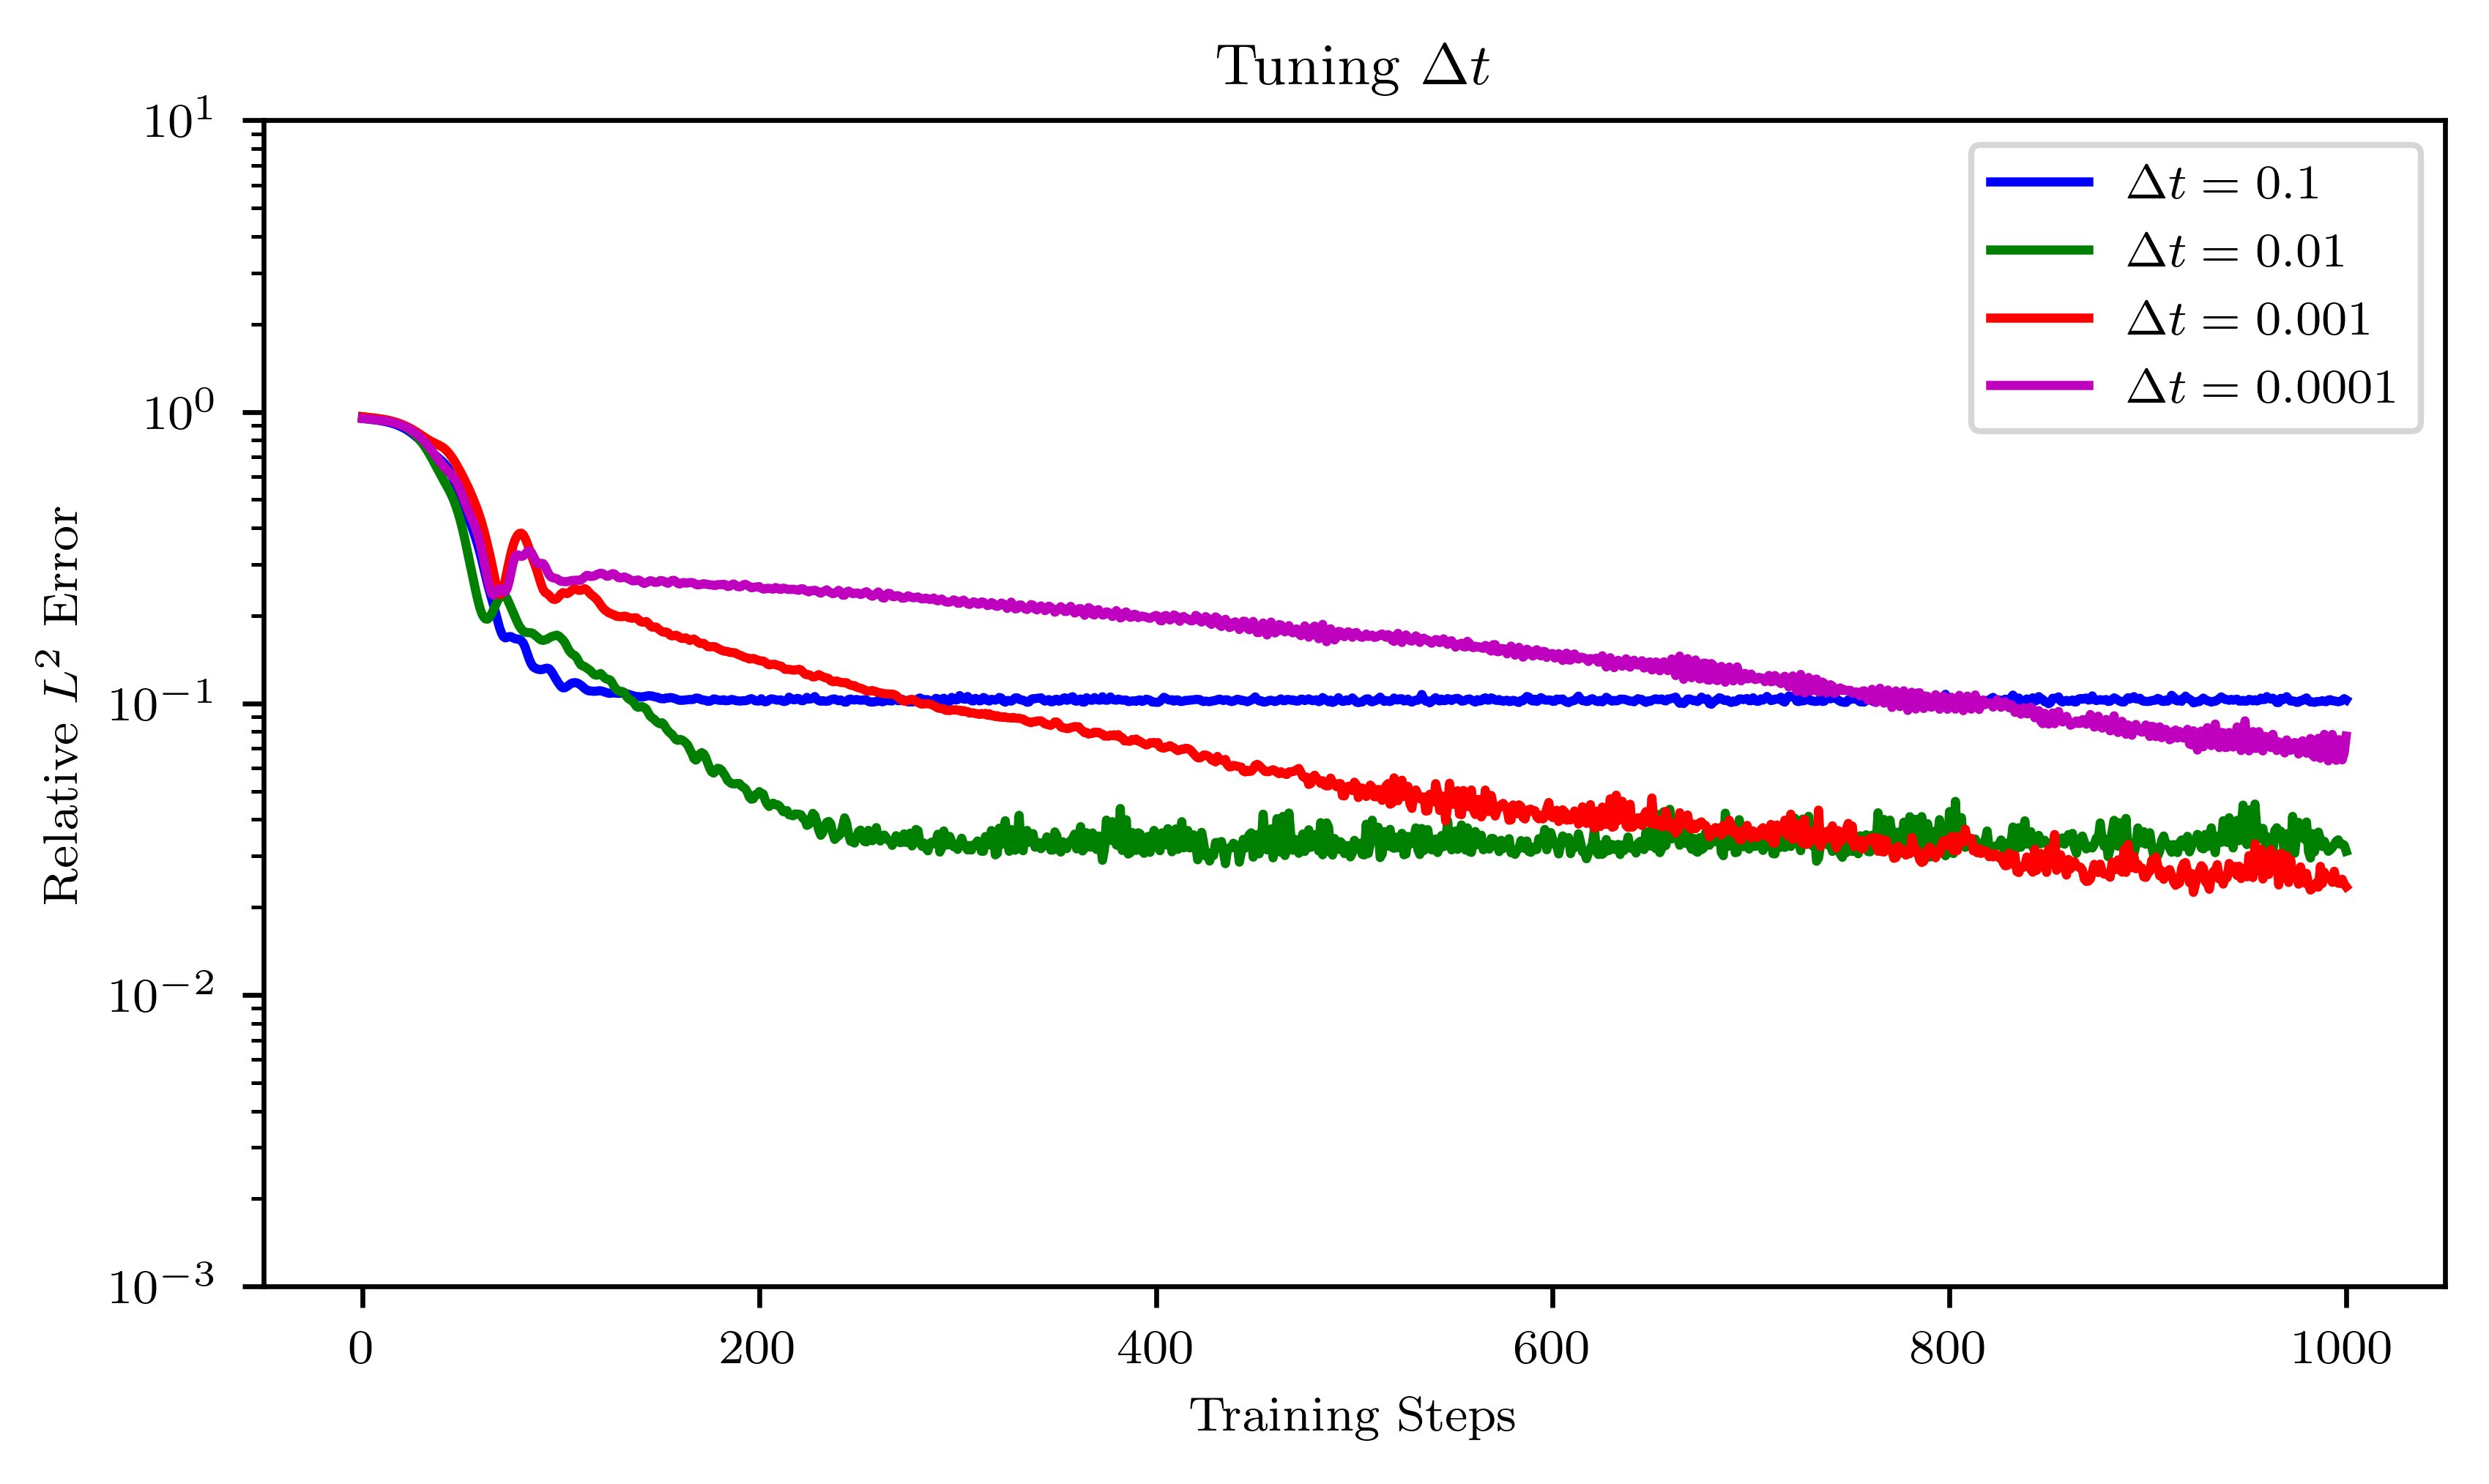

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Tuning $\Delta t$')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(1001), L2dt_errors1/true_L2norm,'b')
ax.semilogy(range(1001), L2dt_errors2/true_L2norm,'g')
ax.semilogy(range(1001), L2dt_errors3/true_L2norm,'r')
ax.semilogy(range(1001), L2dt_errors4/true_L2norm,'m')

ax.legend([r'$\Delta t = 0.1$', r'$\Delta t = 0.01$', r'$\Delta t = 0.001$', r'$\Delta t = 0.0001$'])


In [22]:
dt_noscale1 = 'Stochastic_dt_noscale1'
dt_noscale2 = 'Stochastic_dt_noscale2'
dt_noscale3 = 'Stochastic_dt_noscale3'
dt_noscale4 = 'Stochastic_dt_noscale4'

with open('experiments/'  + dt_noscale1 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors1 = pickle.load(f)
with open('experiments/'  + dt_noscale2 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors2 = pickle.load(f)
with open('experiments/'  + dt_noscale3 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors3 = pickle.load(f)
with open('experiments/'  + dt_noscale4 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors4 = pickle.load(f)

with open('experiments/'  + dt_noscale1 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses1 = pickle.load(f)
with open('experiments/'  + dt_noscale2 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses2 = pickle.load(f)
with open('experiments/'  + dt_noscale3 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses3 = pickle.load(f)
with open('experiments/'  + dt_noscale4 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses4 = pickle.load(f)

L2dt_noscale_errors1 = np.sqrt(dt_noscale_errors1[:,0,0])
L2dt_noscale_errors2 = np.sqrt(dt_noscale_errors2[:,0,0])
L2dt_noscale_errors3 = np.sqrt(dt_noscale_errors3[:,0,0])
L2dt_noscale_errors4 = np.sqrt(dt_noscale_errors4[:,0,0])

L2dt_noscale_losses1 = np.sqrt(dt_noscale_losses1[:,0,0])
L2dt_noscale_losses2 = np.sqrt(dt_noscale_losses2[:,0,0])
L2dt_noscale_losses3 = np.sqrt(dt_noscale_losses3[:,0,0])
L2dt_noscale_losses4 = np.sqrt(dt_noscale_losses4[:,0,0])

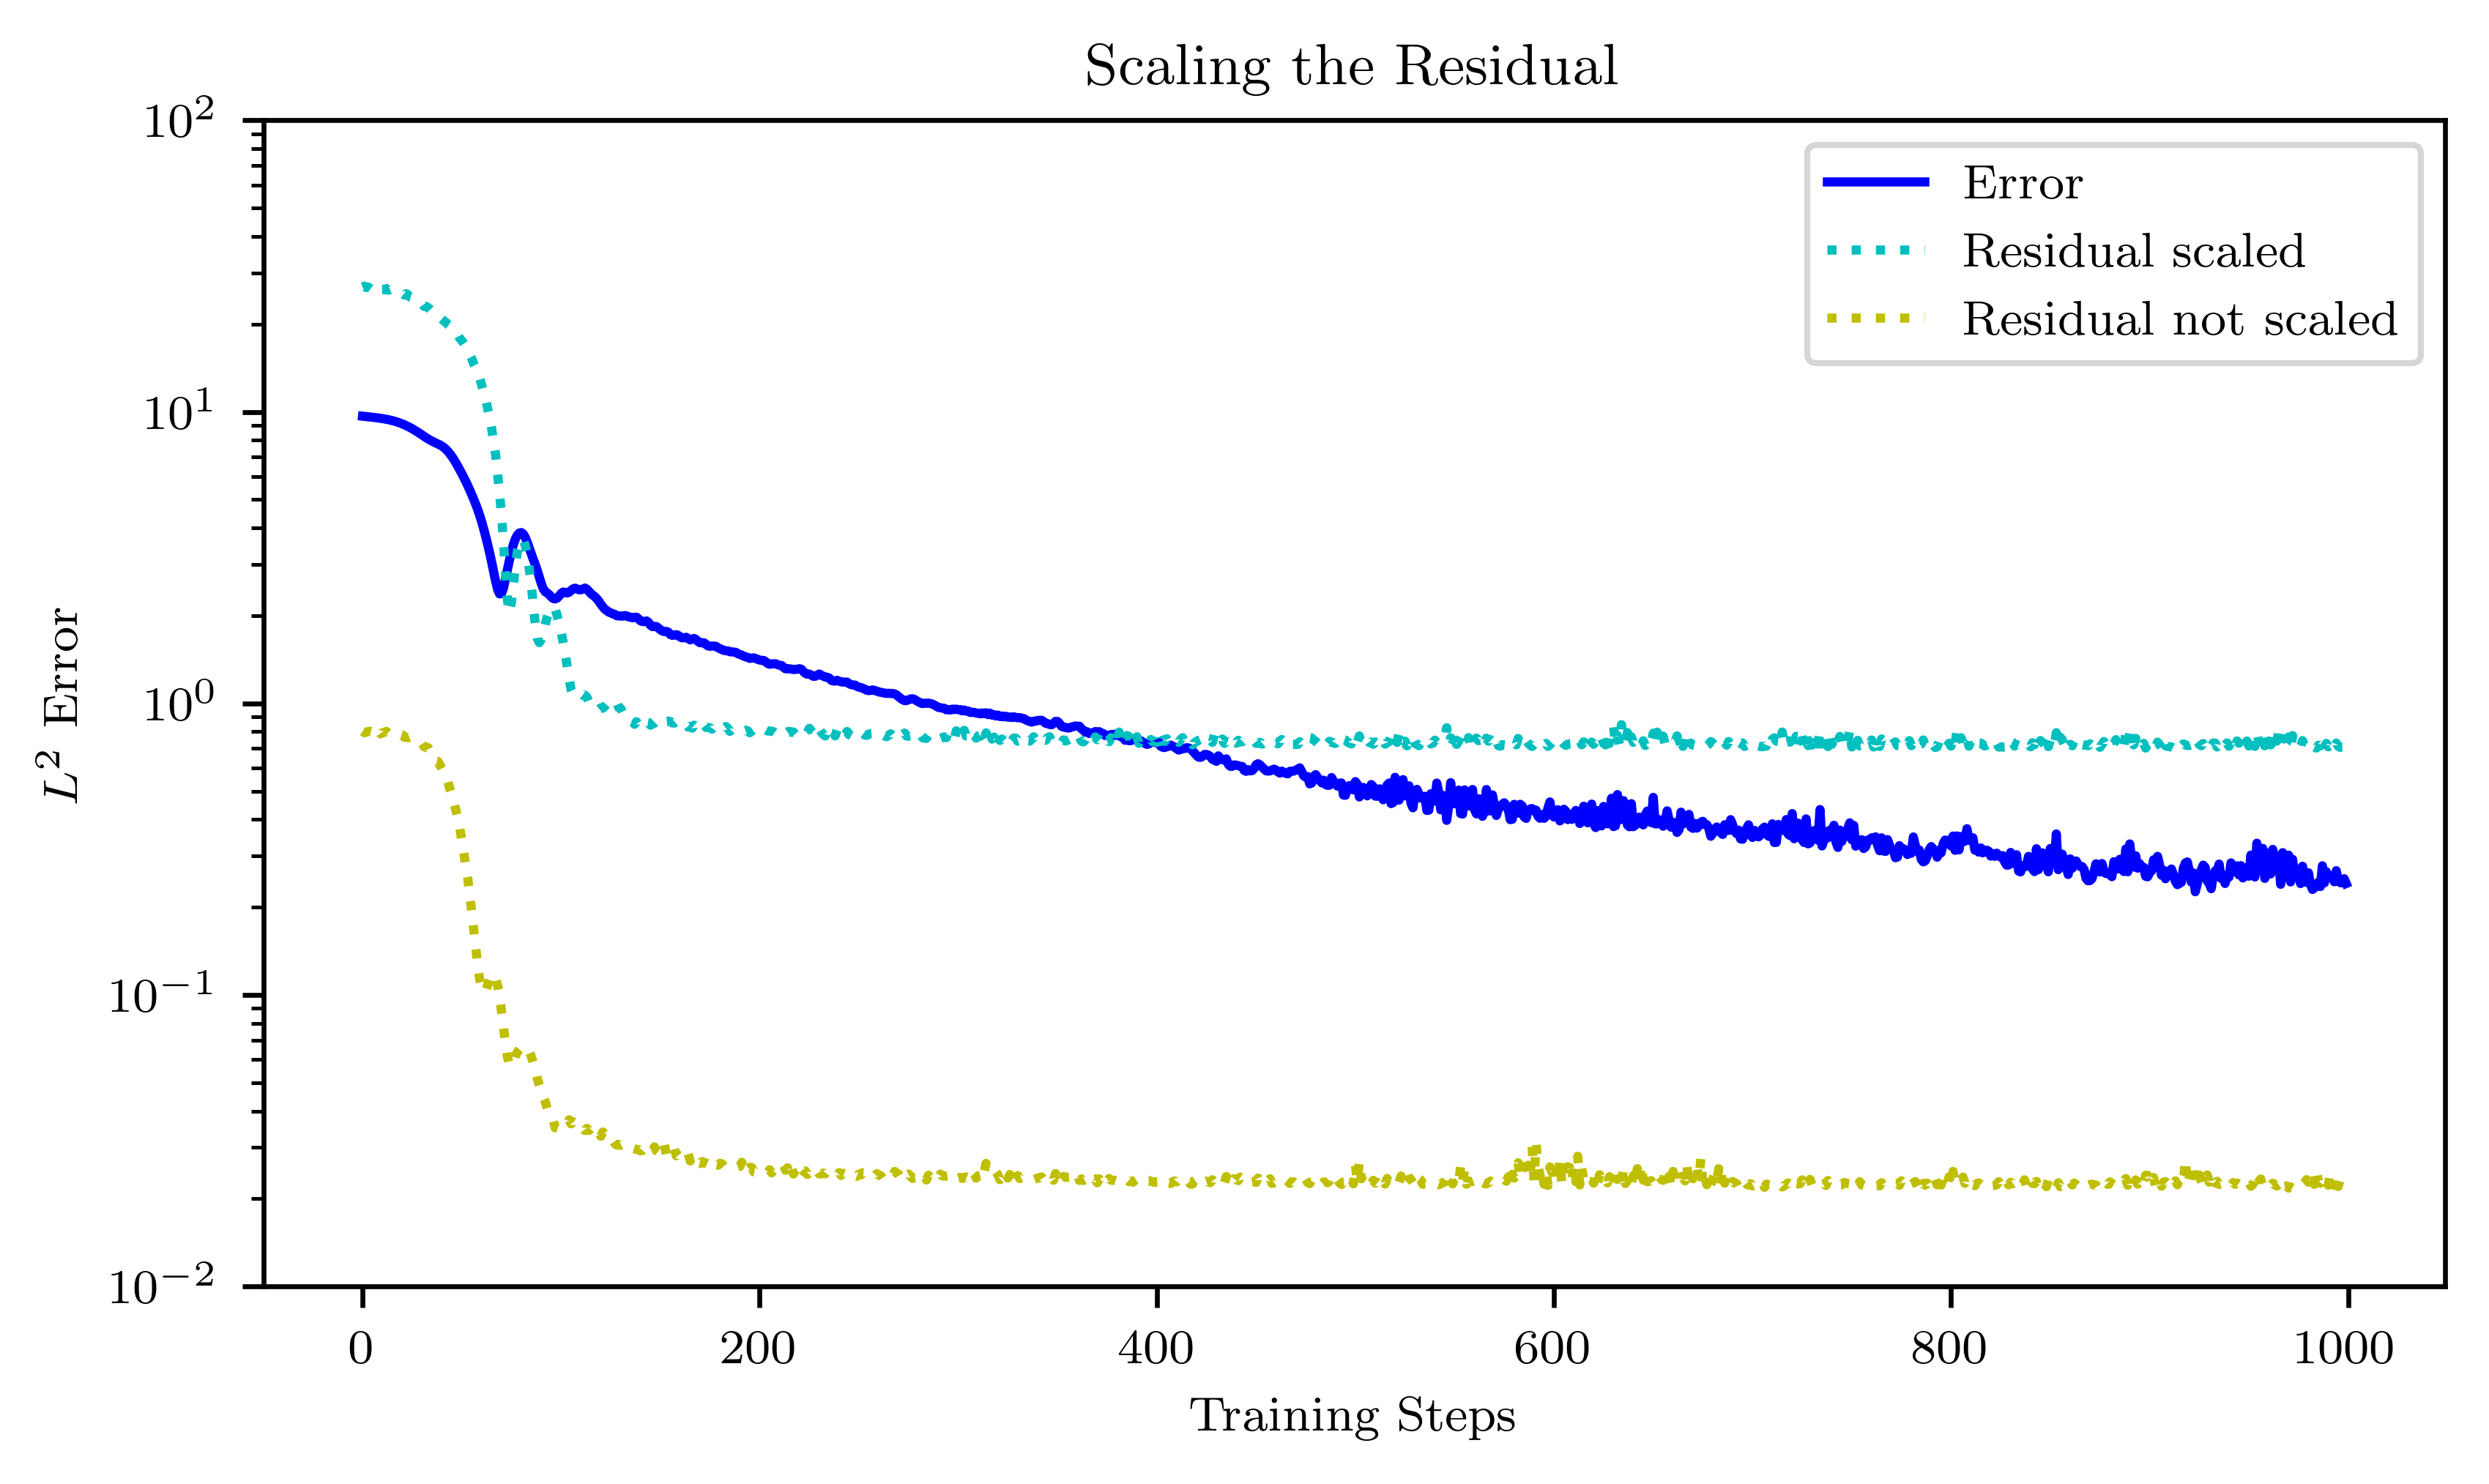

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Scaling the Residual')
ax.set_ylabel(r'$L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-2, 1e2)
ax.semilogy(range(1000), L2dt_errors3[:-1],'b-')
ax.semilogy(range(1000), L2dt_losses3,'c:')
ax.semilogy(range(1000), L2dt_noscale_losses3,'y:')

ax.legend(['Error', 'Residual scaled', 'Residual not scaled'])



#ax.semilogy(range(1000), L2dt_noscale_losses2,'g--')
#ax.semilogy(range(1000), L2dt_noscale_errors2[:-1],'g-')

#ax.semilogy(range(1000), L2dt_noscale_losses3,'r--')
#ax.semilogy(range(1000), L2dt_noscale_errors3[:-1],'r-')

#ax.semilogy(range(1000), L2dt_noscale_losses4,'m--')
#ax.semilogy(range(1000), L2dt_noscale_errors4[:-1],'m-')

#ax.legend([r'$\Delta t = 0.1$', r'$\Delta t = 0.01$', r'$\Delta t = 0.001$', r'$\Delta t = 0.0001$'])


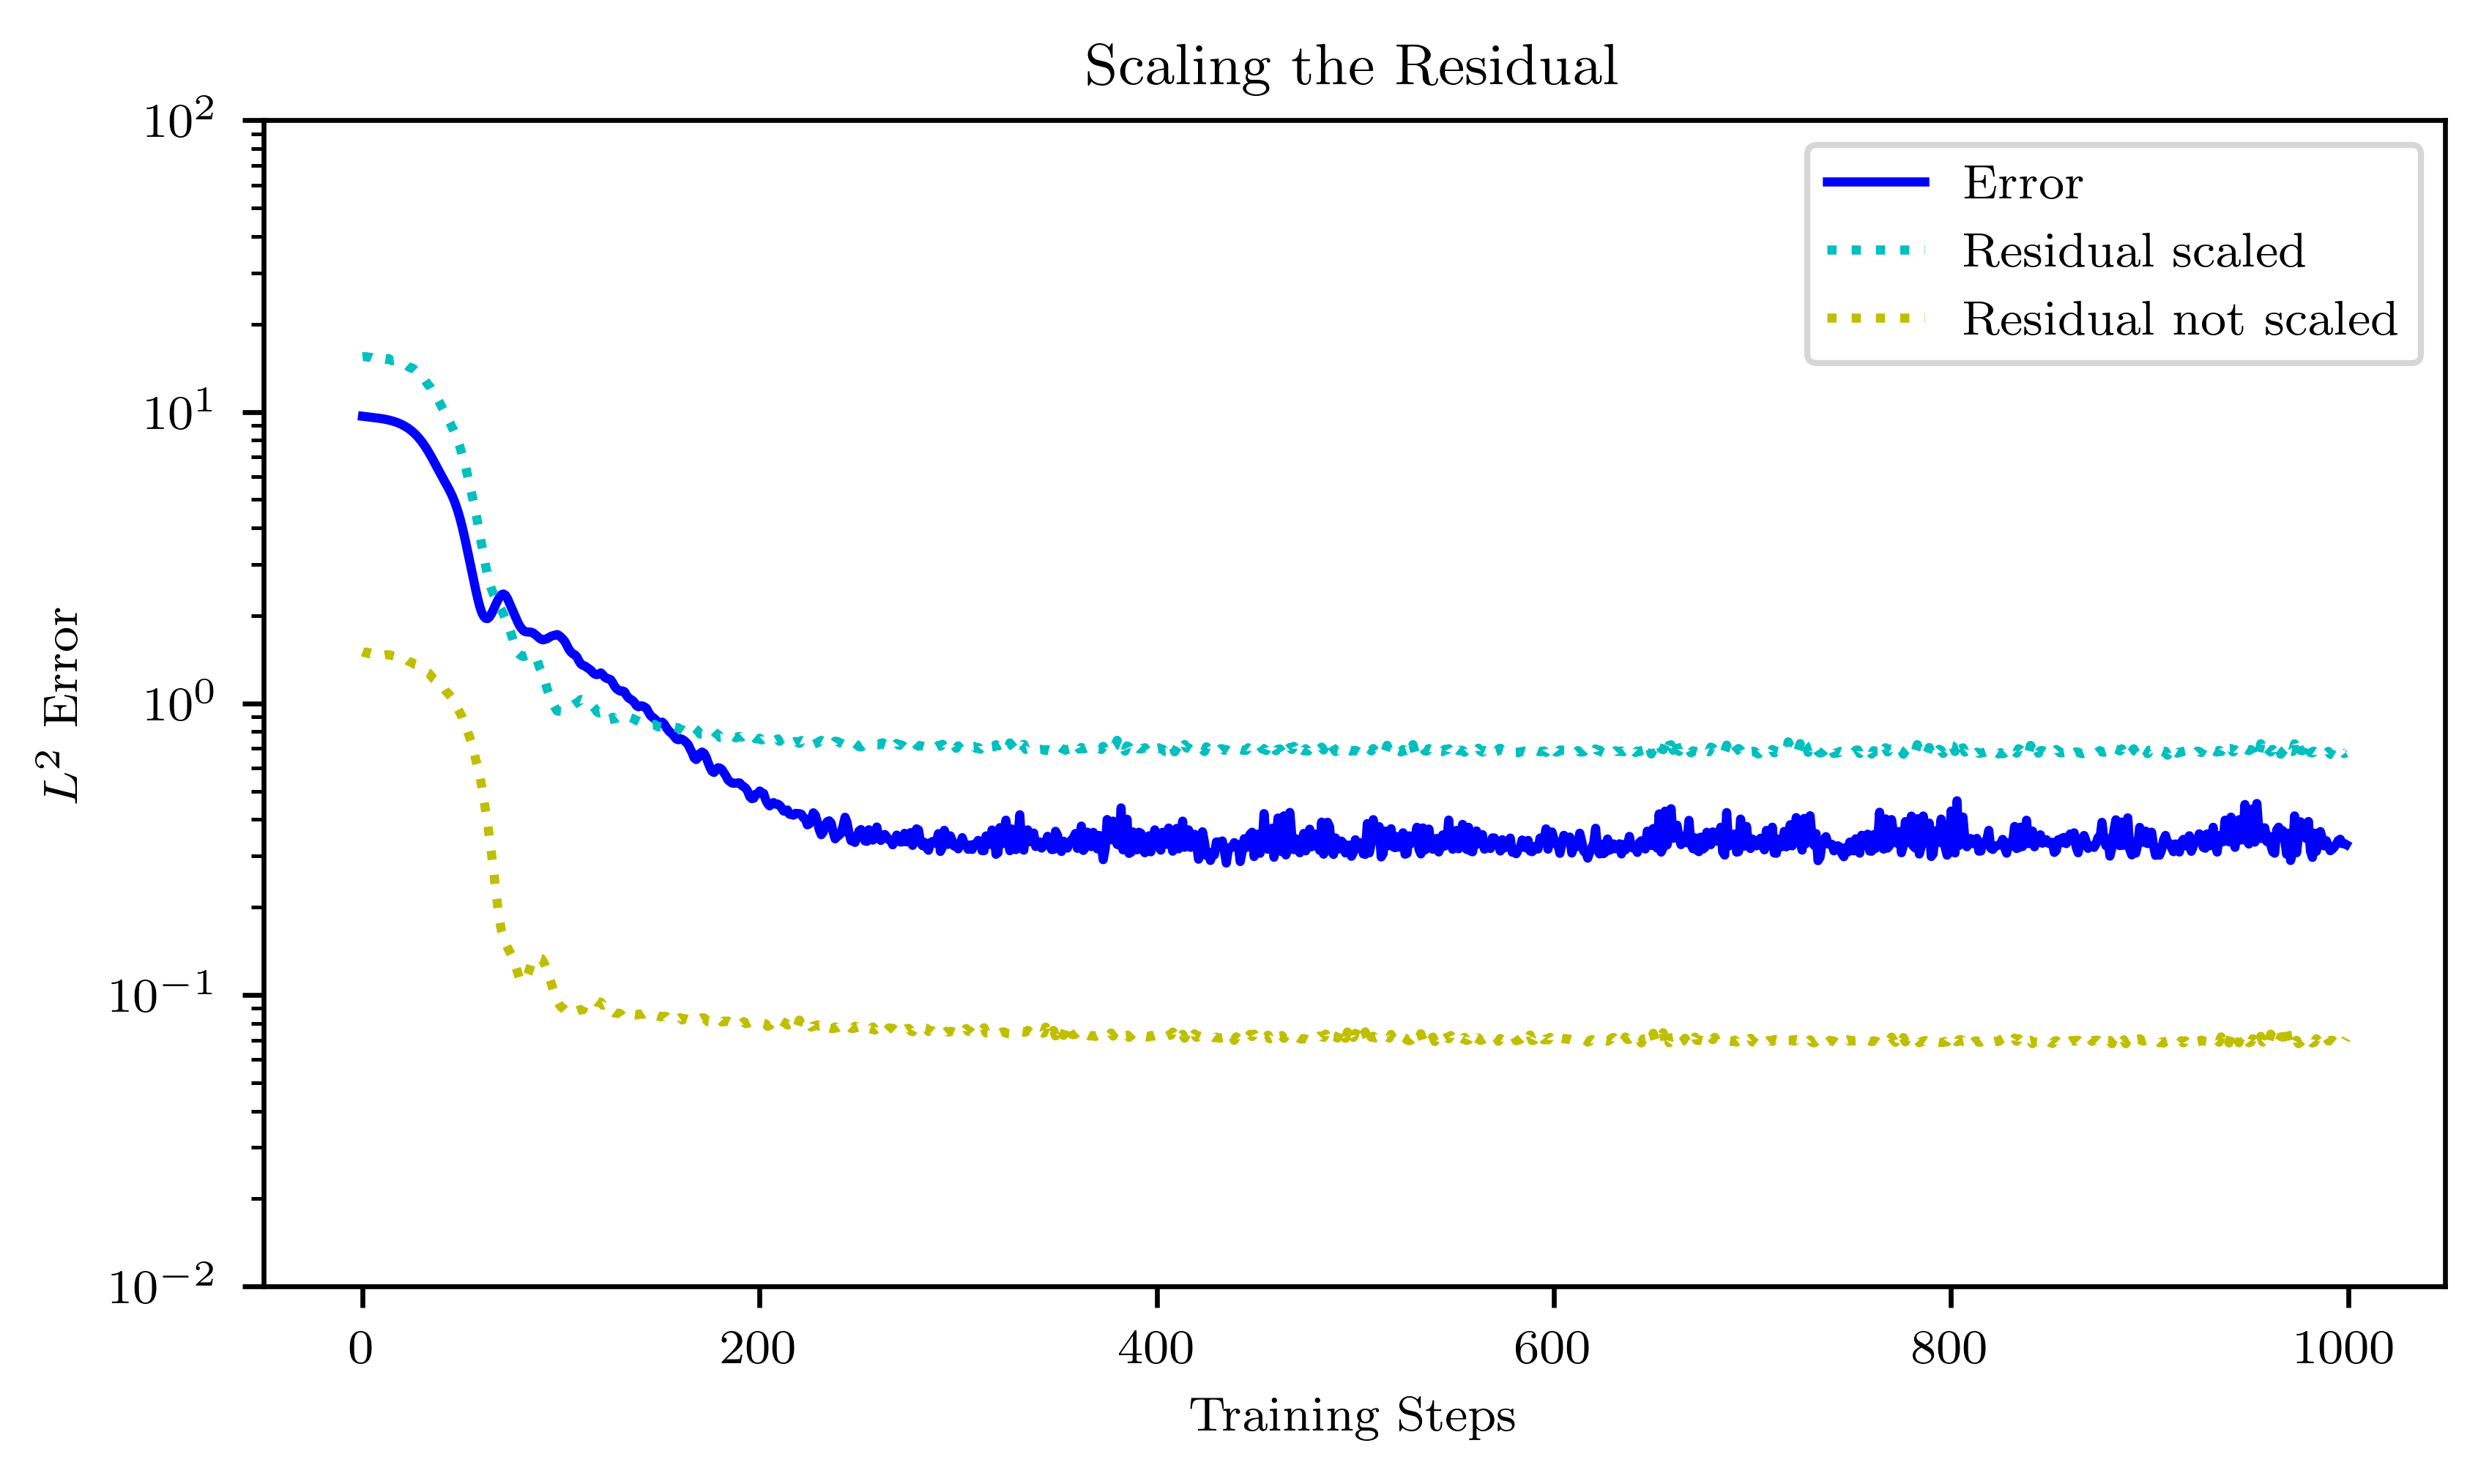

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Scaling the Residual')
ax.set_ylabel(r'$L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-2, 1e2)
ax.semilogy(range(1000), L2dt_errors2[:-1],'b-')
ax.semilogy(range(1000), L2dt_losses2,'c:')
ax.semilogy(range(1000), L2dt_noscale_losses2,'y:')

ax.legend(['Error', 'Residual scaled', 'Residual not scaled'])



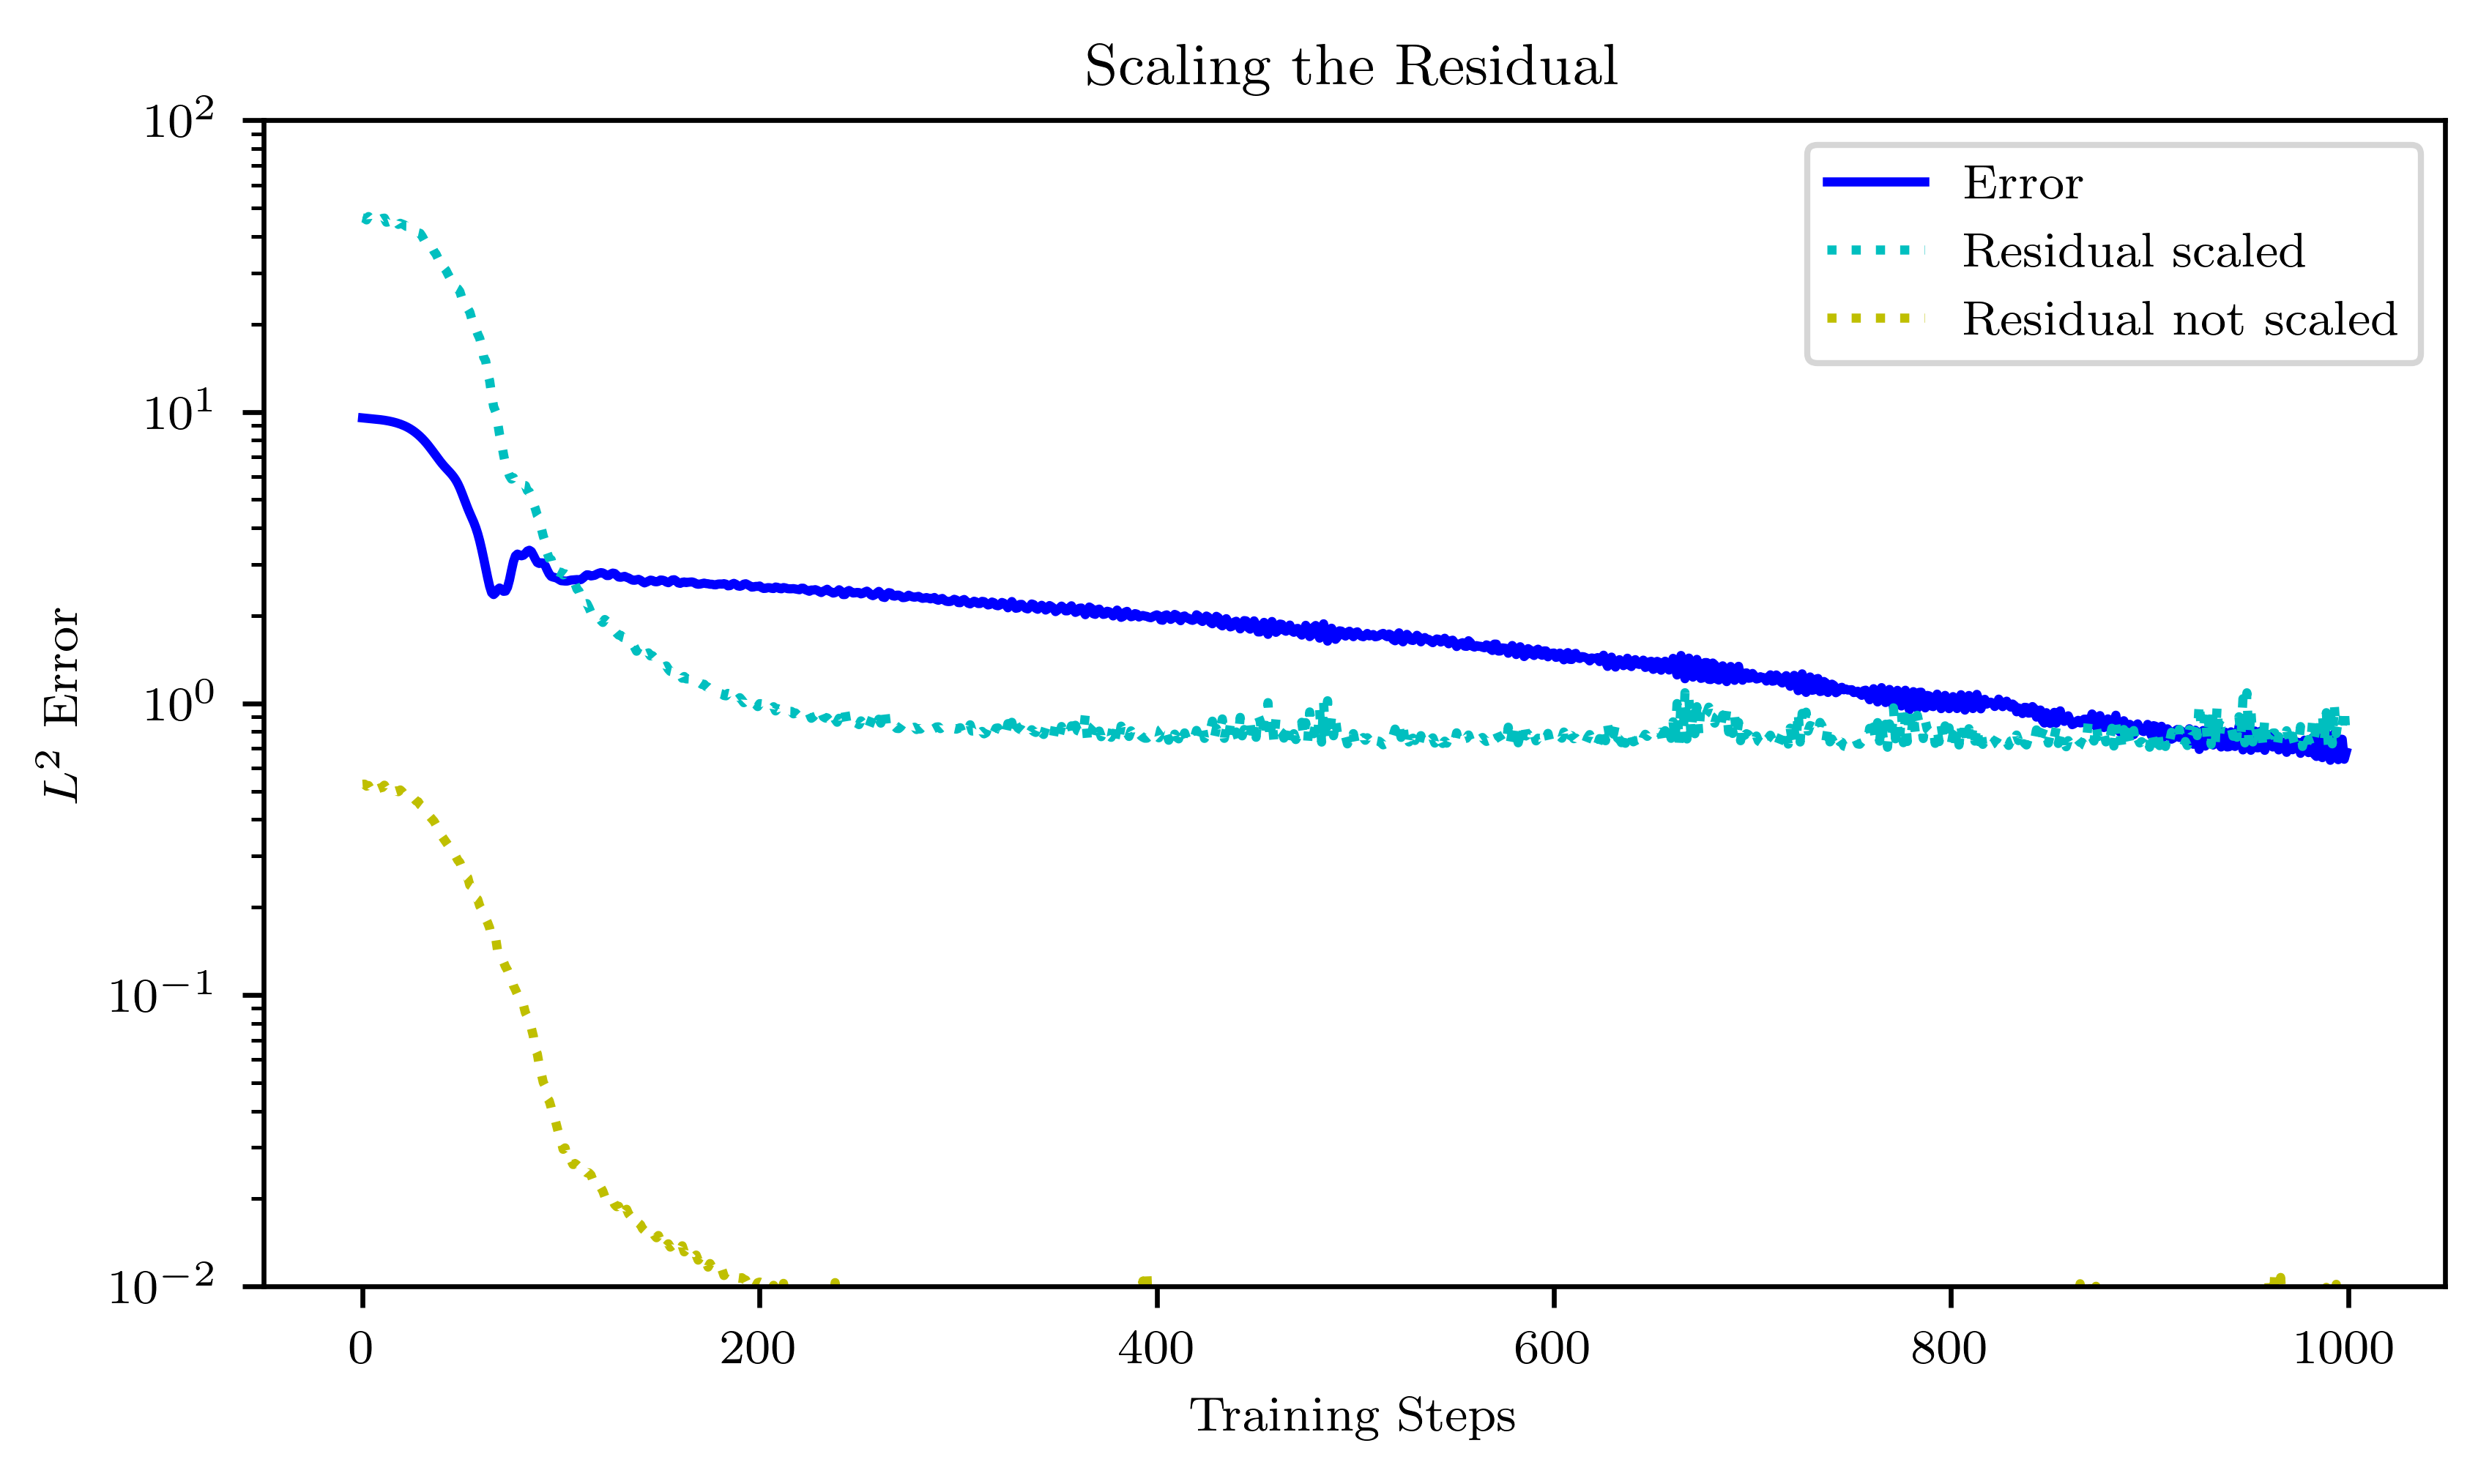

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Scaling the Residual')
ax.set_ylabel(r'$L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-2, 1e2)
ax.semilogy(range(1000), L2dt_errors4[:-1],'b-')
ax.semilogy(range(1000), L2dt_losses4,'c:')
ax.semilogy(range(1000), L2dt_noscale_losses4,'y:')

ax.legend(['Error', 'Residual scaled', 'Residual not scaled'])

